# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px; padding:25px;">Google Bike Sharing - Data Analysis<br>(Visualizations, Folium)</p>

# <p style="background-color:#00CC99; font-family:newtimeroman; font-size:120%; text-align:center; border-radius:10px 10px; padding:15px;">Metadata for Trips Table</p>

### Variables:

**trip_id**: ID attached to each trip taken

**starttime:** day and time trip started, in CST

**stoptime:** day and time trip ended, in CST

**bikeid:** ID attached to each bike

**tripduration:** time of trip in seconds 

**from_station_name:** name of station where trip originated

**to_station_name:** name of station where trip terminated 

**from_station_id:** ID of station where trip originated

**to_station_id:** ID of station where trip terminated

**usertype:** "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership

**gender:** gender of rider 

**birthyear:** birth year of rider



# <p style="background-color:#00CC99; font-family:newtimeroman; font-size:120%; text-align:center; border-radius:10px 10px; padding:15px;">Metadata for Stations Table</p>

### Variables:

**id:** ID attached to each station

**name:** station name

**latitude:** station latitude

**longitude:** station longitude

**dpcapacity:** number of total docks at each station as of 6/30/2016

**online_date:** date the station went live in the system

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import timedelta

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # This shows the numbers up to three digits after the comma.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')       # Hide all warnings in the output.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/google-data-analytics-capstone-cyclistic-data/202110-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202109-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202111-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202107-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202202-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202203-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202205-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202108-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202106-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202201-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic-data/202204-divvy-tripdata.csv
/kaggle/input/google-data-analytics-capstone-cyclistic

In [2]:
# df_1 = pd.read_csv('202004-divvy-tripdata.csv', sep=';', encoding='utf-8')

In [3]:
import glob

df0 = pd.concat([pd.read_csv(f, engine='python', header=0) for f in \
                 glob.glob("/kaggle/input/google-data-analytics-capstone-cyclistic-data/" + '*.csv')])

# Concatenate and read all the csv-data-files.

In [4]:
df = df0.copy()    # Make a copy from Dataset for any case.
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  620BC6107255BF4C  electric_bike  2021-10-22 12:46:42  2021-10-22 12:49:50   
1  4471C70731AB2E45  electric_bike  2021-10-21 09:12:37  2021-10-21 09:14:14   
2  26CA69D43D15EE14  electric_bike  2021-10-16 16:28:39  2021-10-16 16:36:26   
3  362947F0437E1514  electric_bike  2021-10-16 16:17:48  2021-10-16 16:19:03   
4  BB731DE2F2EC51C5  electric_bike  2021-10-20 23:17:54  2021-10-20 23:26:10   

         start_station_name start_station_id end_station_name end_station_id  \
0  Kingsbury St & Kinzie St     KA1503000043              NaN            NaN   
1                       NaN              NaN              NaN            NaN   
2                       NaN              NaN              NaN            NaN   
3                       NaN              NaN              NaN            NaN   
4                       NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  
0     41.889    -87.638   41.890  -87.630        member  
1     41.930    -87.700   41.930  -87.710        member  
2     41.920    -87.700   41.940  -87.720        member  
3     41.920    -87.690   41.920  -87.690        member  
4     41.890    -87.710   41.890  -87.690        member

In [5]:
df.shape

(5860776, 13)

In [6]:
df.isna().sum()  #Total Null values on features.

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    823167
start_station_id      823164
end_station_name      878338
end_station_id        878338
start_lat                  0
start_lng                  0
end_lat                 5036
end_lng                 5036
member_casual              0
dtype: int64

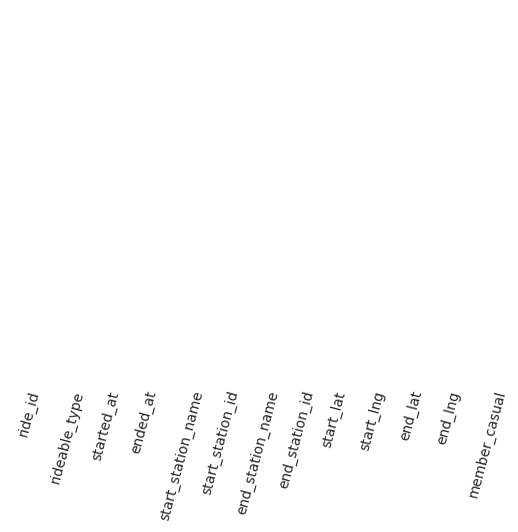

In [7]:
# Visualization of the Null-values on every features.

sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis', linewidths=0.5)
plt.xticks(rotation=75)
plt.show()

# **Filling Missing Values**

**Missing Value Filling Function**

In [8]:
def fill_missing(df, fill_col, use_col):
    """
    Parameters
    -------------------
    df : Dataset.
    
        Dataset name which has null value. \n
    
    fill_col : Text.
    
        The column name whose missing values will be filling. \n
    
    use_col : Text.
    
        The referenced column name to fill missing values.
    """
    df[fill_col] = df.groupby(use_col)[fill_col].ffill().bfill()

In [9]:
fill_missing(df, "start_station_name", "start_station_id")
fill_missing(df, "start_station_id", "start_station_name")
fill_missing(df, "end_station_name", "end_station_id")
fill_missing(df, "end_station_id", "end_station_name")
fill_missing(df, "start_lat", "start_station_id")
fill_missing(df, "start_lng", "start_station_id")
fill_missing(df, "end_lat", "end_station_id")
fill_missing(df, "end_lng", "end_station_id")

In [10]:
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

# **Dataset Information Function**

In [11]:
def info_data(df):
    # Number of rows in total
    print(f'\n\033[1mTotal Rows :\033[0m {df.shape[0]} \n')  # \033[1m {your_text} \033[0m : makes your_text bold

    # Number of features in total
    print(f'\n\033[1mTotal Features :\033[0m {df.shape[1]} \n')

    # Extracting the column names
    feat_name = df.columns
    print(f'\n\033[1mColumn Names:\033[0m ' + f'{feat_name} \n')

    # Number of duplicates in total
    duplicates = df.duplicated().sum()
    print(f'\n\033[1mDuplicates:\033[0m ' + f'{duplicates} \n')

    # Overview of the data
    print(f'\033[1mOverview of the data:\033[0m\n')
    infos = df.info()

    # Total null values by each category
    null_val = df.isnull().sum()
    print(f'\n\033[1mNull Values\033[0m\n' + f'{null_val} \n')

    # Descriptive statistics of object columns
    describe = df.describe(include="O").T
    print(f'\n\033[1mDescriptive Statistics of Object Columns:\033[0m\n' + f'{describe} \n')

# **Dataset Preperation Function**

In [12]:
def data_prep(df):
    # Changing the dtypes of the columns „started_at“ and „ended_at“.
    df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True)
    df['ended_at'] = pd.to_datetime(df['ended_at'], dayfirst=True)

    # Adding and calculating two columns with the names „day_name“ and „ride_time“
    df['day_name'] = df.started_at.apply(lambda i: i.day_name())
    df['ride_time'] = ((df['ended_at'] - df['started_at']) / timedelta(minutes=1)).round(decimals=1)

# **Dataset Columns Information Function**

In [13]:
# Definition of a function that shows first info of the columns:

def col_info(col):
    for i in col:
        print("\033[1mFeature Name        :\033[0m ", i)
        print("--------------------------------")
        print("\033[1mTotal Null Values   :\033[0m ", df[i].isnull().sum())
        print("\033[1mPercent of Null Values   :\033[0m ", "%", round(df[i].isnull().sum()/df.shape[0]*100, 2))
        
        if df[i].nunique() < 10:
            print("\033[1mNumber of Unique Values     :\033[0m ", df[i].nunique())
            print("\n--------------------------------")
            print(df[i].value_counts(dropna = False))
        else:
            print("\033[1mNumber of Unique Values     :\033[0m ", df[i].nunique())
        
        print(" \\*/ " * 9,"\n" * 2)

In [14]:
info_data(df)


Total Rows : 5860776 


Total Features : 13 


Column Names: Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object') 


Duplicates: 0 

Overview of the data:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory us

In [15]:
data_prep(df)

In [16]:
col_info(df)

Feature Name        :  ride_id
--------------------------------
Total Null Values   :  0
Percent of Null Values   :  % 0.0
Number of Unique Values     :  5860776
 \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  


Feature Name        :  rideable_type
--------------------------------
Total Null Values   :  0
Percent of Null Values   :  % 0.0
Number of Unique Values     :  3

--------------------------------
classic_bike     3217737
electric_bike    2368592
docked_bike       274447
Name: rideable_type, dtype: int64
 \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  


Feature Name        :  started_at
--------------------------------
Total Null Values   :  0
Percent of Null Values   :  % 0.0
Number of Unique Values     :  4896834
 \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  


Feature Name        :  ended_at
--------------------------------
Total Null Values   :  0
Percent of Null Values   :  % 0.0
Number of Unique Values     :  4893478
 \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  \*/  


Feature N

In [17]:
df.sample(10)

ride_id  rideable_type          started_at  \
128576  B4AFADFE4C4E60DA  electric_bike 2021-10-27 11:53:48   
447309  0B621BDFC52C00A5   classic_bike 2021-08-31 17:31:45   
235314  51EB581ACC525566  electric_bike 2022-05-10 18:16:34   
501214  0D4DC2D5BAECB566  electric_bike 2021-10-16 18:38:35   
501853  2D2B2B4E5D17BED5  electric_bike 2021-07-31 19:54:40   
321692  DD1F39A64C773518   classic_bike 2021-09-11 14:10:18   
662986  CC438AB168148B8E  electric_bike 2021-09-05 20:15:47   
534252  50E80745351E4C8A   classic_bike 2021-09-26 16:47:23   
1358    FCBA2CFEC4B4B3AC  electric_bike 2022-02-20 15:36:31   
47154   EFBAF367AADAFCA4  electric_bike 2022-02-18 21:30:01   

                  ended_at             start_station_name start_station_id  \
128576 2021-10-27 11:59:06   Southport Ave & Waveland Ave            13235   
447309 2021-08-31 17:35:40      Halsted St & Clybourn Ave              331   
235314 2022-05-10 18:29:13         Clark St & Lincoln Ave            13179   
501214 2021-10-16 18:42:50       Kingsbury St & Kinzie St     KA1503000043   
501853 2021-07-31 20:20:49   Lakefront Trail & Wilson Ave              639   
321692 2021-09-11 14:31:14              Adler Planetarium            13431   
662986 2021-09-05 20:34:48    Lincoln Ave & Fullerton Ave     TA1309000058   
534252 2021-09-26 17:34:49  Lakeview Ave & Fullerton Pkwy     TA1309000019   
1358   2022-02-20 15:43:08       Clark St & Bryn Mawr Ave     KA1504000151   
47154  2022-02-18 21:34:16         Clinton St & Tilden St            13037   

                     end_station_name end_station_id  start_lat  start_lng  \
128576   Sheridan Rd & Irving Park Rd          13063     41.948    -87.664   
447309        Sedgwick St & North Ave   TA1307000038     41.910    -87.648   
235314          Wood St & Chicago Ave            637     41.916    -87.635   
501214              Kilbourn & Belden            359     41.790    -87.600   
501853           New St & Illinois St   TA1306000013     41.966    -87.645   
321692  Michigan Ave & Ida B Wells Dr   TA1305000010     41.866    -87.607   
662986          Michigan Ave & Oak St          13042     41.926    -87.649   
534252  Lakeview Ave & Fullerton Pkwy   TA1309000019     41.926    -87.639   
1358         Clark St & Bryn Mawr Ave   KA1504000151     41.984    -87.669   
47154            Federal St & Polk St         SL-008     41.876    -87.641   

        end_lat  end_lng member_casual   day_name  ride_time  
128576   41.954  -87.654        member  Wednesday      5.300  
447309   41.911  -87.639        member    Tuesday      3.900  
235314   41.950  -87.660        member    Tuesday     12.600  
501214   41.790  -87.600        member   Saturday      4.200  
501853   41.891  -87.618        member   Saturday     26.200  
321692   41.876  -87.624        casual   Saturday     20.900  
662986   41.920  -87.710        casual     Sunday     19.000  
534252   41.926  -87.639        casual     Sunday     47.400  
1358     41.984  -87.669        member     Sunday      6.600  
47154    41.872  -87.630        casual     Friday      4.200

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:100%; text-align:center; border-radius:10px 10px; padding:10px;">Plotting the Distribution of Various Discrete Features<br>on Rideable Type, Member Casual, Day of Week</p>

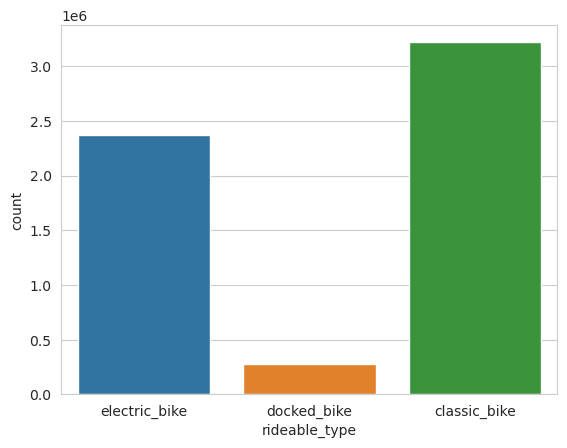

In [18]:
fig, ax = plt.subplots()

chart = sns.countplot(x="rideable_type", data=df)

# chart.bar_label(chart.containers[0]);

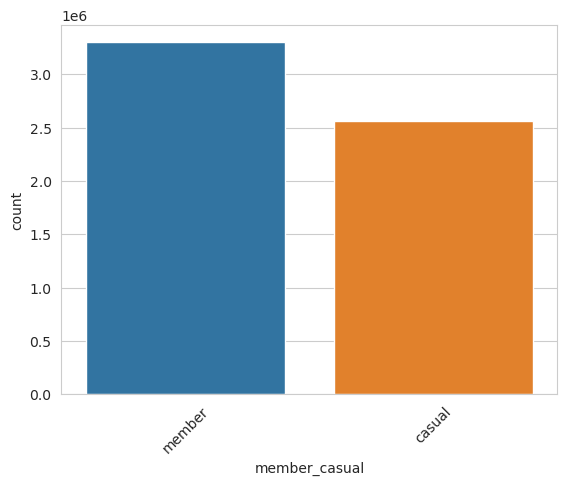

In [19]:
fig, ax = plt.subplots()

chart = sns.countplot(x="member_casual", data=df)
plt.xticks(rotation=45);
# chart.bar_label(chart.containers[0]);

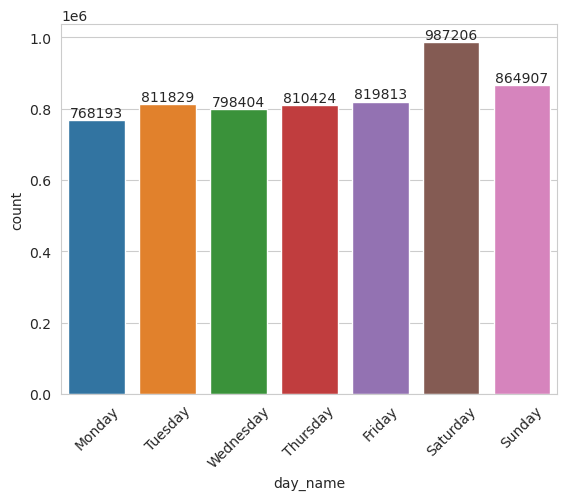

In [20]:
fig, ax = plt.subplots()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
chart = sns.countplot(x="day_name", data=df, order=order)
plt.xticks(rotation=45)
chart.bar_label(chart.containers[0]);

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:100%; text-align:center; border-radius:10px 10px; padding:10px;">Feature Engineering</p>

In [21]:
df.started_at.dt.year.sample(5)

671494    2021
145102    2021
42055     2021
720024    2021
65854     2021
Name: started_at, dtype: int64

In [22]:
df.started_at.max() - df.started_at.min()

Timedelta('364 days 23:59:18')

In [23]:
func = lambda x: x.strftime("%Y-%m-%d")

df["date"] = func(df.started_at.dt)
df["year"] = df.started_at.dt.year
df["month"] = df.started_at.dt.month
df["day_of_month"] = df.started_at.dt.day
# df["day_index"] = df.started_at.dt.dayofweek
df["hour"] = df.started_at.dt.hour

In [24]:
df.info()

# 9 Columns are object, let's see if we could change them to numeric.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 247539
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  day_name            object        
 14  ride_time           float64       
 15  date                object        
 16  year                int64         
 17  month               int64         
 18  day_of_month        int64         
 19  hour                int64         
dtypes: 

In [25]:
df.head()

ride_id  rideable_type          started_at            ended_at  \
0  620BC6107255BF4C  electric_bike 2021-10-22 12:46:42 2021-10-22 12:49:50   
1  4471C70731AB2E45  electric_bike 2021-10-21 09:12:37 2021-10-21 09:14:14   
2  26CA69D43D15EE14  electric_bike 2021-10-16 16:28:39 2021-10-16 16:36:26   
3  362947F0437E1514  electric_bike 2021-10-16 16:17:48 2021-10-16 16:19:03   
4  BB731DE2F2EC51C5  electric_bike 2021-10-20 23:17:54 2021-10-20 23:26:10   

         start_station_name start_station_id       end_station_name  \
0  Kingsbury St & Kinzie St     KA1503000043  Michigan Ave & Oak St   
1     Michigan Ave & Oak St            13042  Michigan Ave & Oak St   
2     Michigan Ave & Oak St            13042  Michigan Ave & Oak St   
3     Michigan Ave & Oak St            13042  Michigan Ave & Oak St   
4     Michigan Ave & Oak St            13042  Michigan Ave & Oak St   

  end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  \
0          13042     41.889    -87.638   41.890  -87.630        member   
1          13042     41.930    -87.700   41.930  -87.710        member   
2          13042     41.920    -87.700   41.940  -87.720        member   
3          13042     41.920    -87.690   41.920  -87.690        member   
4          13042     41.890    -87.710   41.890  -87.690        member   

    day_name  ride_time        date  year  month  day_of_month  hour  
0     Friday      3.100  2021-10-22  2021     10            22    12  
1   Thursday      1.600  2021-10-21  2021     10            21     9  
2   Saturday      7.800  2021-10-16  2021     10            16    16  
3   Saturday      1.200  2021-10-16  2021     10            16    16  
4  Wednesday      8.300  2021-10-20  2021     10            20    23

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 247539
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  day_name            object        
 14  ride_time           float64       
 15  date                datetime64[ns]
 16  year                int64         
 17  month               int64         
 18  day_of_month        int64         
 19  hour                int64         
dtypes: 

In [28]:
mapping = {'Sunday': "Weekend", 'Monday': "Weekday", 'Tuesday': "Weekday", 'Wednesday': "Weekday", 
           'Thursday': "Weekday", 'Friday': "Weekday", 'Saturday': "Weekend"}

df['is_weekend'] = df['day_name'].map(mapping)

## Or creating Boolean column
# df = pd.DataFrame({'day_name': ['Sunday', 'Monday', 'Saturday', 'Wednesday', 'Friday']})

# df['is_weekend'] = df['day_name'].apply(lambda x: x in ['Saturday', 'Sunday'])

In [29]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day_name', 'ride_time', 'date', 'year', 'month',
       'day_of_month', 'hour', 'is_weekend'],
      dtype='object')

In [30]:
df.tail(10)

ride_id  rideable_type          started_at  \
247530  46C3F13E9342A2C9  electric_bike 2021-12-03 22:19:07   
247531  08E5EC2EC583D230  electric_bike 2021-12-17 07:55:47   
247532  8DF0DBB049906332  electric_bike 2021-12-01 16:50:52   
247533  DFE48801A70DFEA7  electric_bike 2021-12-23 21:28:41   
247534  92BBAB97D1683D69  electric_bike 2021-12-24 15:42:09   
247535  847431F3D5353AB7  electric_bike 2021-12-12 13:36:55   
247536  CF407BBC3B9FAD63  electric_bike 2021-12-06 19:37:50   
247537  60BB69EBF5440E92  electric_bike 2021-12-02 08:57:04   
247538  C414F654A28635B8  electric_bike 2021-12-13 09:00:26   
247539  37AC57E34B2E7E97   classic_bike 2021-12-13 08:45:32   

                  ended_at           start_station_name start_station_id  \
247530 2021-12-03 22:24:49         Halsted St & 96th St            20105   
247531 2021-12-17 08:03:45        Canal St & Madison St            13341   
247532 2021-12-01 16:55:18        Canal St & Madison St            13341   
247533 2021-12-23 21:36:27        Canal St & Madison St            13341   
247534 2021-12-24 19:29:35        Canal St & Madison St            13341   
247535 2021-12-12 13:56:08        Canal St & Madison St            13341   
247536 2021-12-06 19:44:51        Canal St & Madison St            13341   
247537 2021-12-02 09:05:21        Canal St & Madison St            13341   
247538 2021-12-13 09:14:39       Lawndale Ave & 16th St            362.0   
247539 2021-12-13 08:49:09  Michigan Ave & Jackson Blvd     TA1309000002   

                 end_station_name end_station_id  start_lat  start_lng  ...  \
247530  Desplaines St & Kinzie St   TA1306000003     41.720    -87.643  ...   
247531  Desplaines St & Kinzie St   TA1306000003     41.882    -87.639  ...   
247532  Desplaines St & Kinzie St   TA1306000003     41.882    -87.639  ...   
247533   Kingsbury St & Kinzie St   KA1503000043     41.882    -87.639  ...   
247534   Kingsbury St & Kinzie St   KA1503000043     41.882    -87.640  ...   
247535   Kingsbury St & Kinzie St   KA1503000043     41.882    -87.640  ...   
247536   Kingsbury St & Kinzie St   KA1503000043     41.882    -87.640  ...   
247537    Dearborn St & Monroe St   TA1305000006     41.882    -87.640  ...   
247538    Dearborn St & Monroe St   TA1305000006     41.860    -87.720  ...   
247539    Dearborn St & Monroe St   TA1305000006     41.878    -87.624  ...   

        end_lng  member_casual   day_name ride_time       date  year  month  \
247530  -87.640         casual     Friday     5.700 2021-12-03  2021     12   
247531  -87.620         casual     Friday     8.000 2021-12-17  2021     12   
247532  -87.644         casual  Wednesday     4.400 2021-12-01  2021     12   
247533  -87.650         casual   Thursday     7.800 2021-12-23  2021     12   
247534  -87.640         casual     Friday   227.400 2021-12-24  2021     12   
247535  -87.610         casual     Sunday    19.200 2021-12-12  2021     12   
247536  -87.639         member     Monday     7.000 2021-12-06  2021     12   
247537  -87.630         member   Thursday     8.300 2021-12-02  2021     12   
247538  -87.710         member     Monday    14.200 2021-12-13  2021     12   
247539  -87.630         member     Monday     3.600 2021-12-13  2021     12   

        day_of_month  hour  is_weekend  
247530             3    22     Weekday  
247531            17     7     Weekday  
247532             1    16     Weekday  
247533            23    21     Weekday  
247534            24    15     Weekday  
247535            12    13     Weekend  
247536             6    19     Weekday  
247537             2     8     Weekday  
247538            13     9     Weekday  
247539            13     8     Weekday  

[10 rows x 21 columns]

In [31]:
df = df[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'is_weekend', 'day_name', 'date', 'year',
       'month', 'day_of_month', 'hour', 'ride_time']]

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:125%; text-align:center; border-radius:10px 10px; padding:10px;">Visualizing the Correleation with a Heatmap</p>

In [32]:
corr = df[["ride_time", "year", "month", "day_of_month", "hour"]].corr()
corr

ride_time   year  month  day_of_month   hour
ride_time         1.000 -0.007 -0.004        -0.005  0.002
year             -0.007  1.000 -0.771         0.081 -0.011
month            -0.004 -0.771  1.000        -0.088 -0.013
day_of_month     -0.005  0.081 -0.088         1.000 -0.000
hour              0.002 -0.011 -0.013        -0.000  1.000

In [33]:
corr.index

Index(['ride_time', 'year', 'month', 'day_of_month', 'hour'], dtype='object')

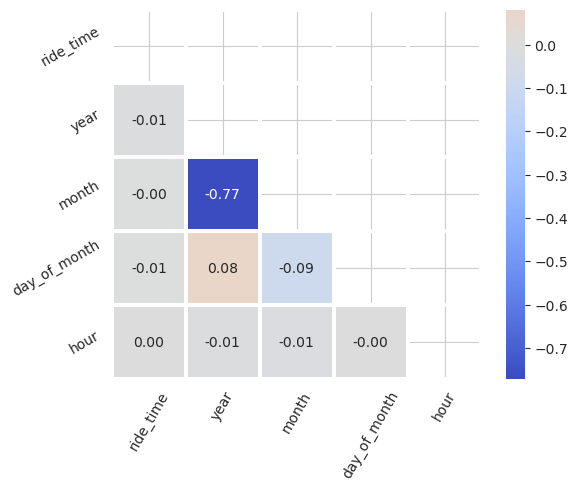

In [34]:
# Visualization of correlation between columns

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', ax=None, linewidths=1.5, center=0, annot=True,
            fmt='.2f', square=True, xticklabels=(corr.index), yticklabels=(corr.columns))

plt.xticks(rotation=60)
plt.yticks(rotation=30)
# plt.axis('off')
plt.grid('off')
plt.show()

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:125%; text-align:center; border-radius:10px 10px; padding:10px;">Riding Visualizations</p>

### Total Rides

In [35]:
df_ride_daily = pd.DataFrame(df.groupby("date").ride_id.count())

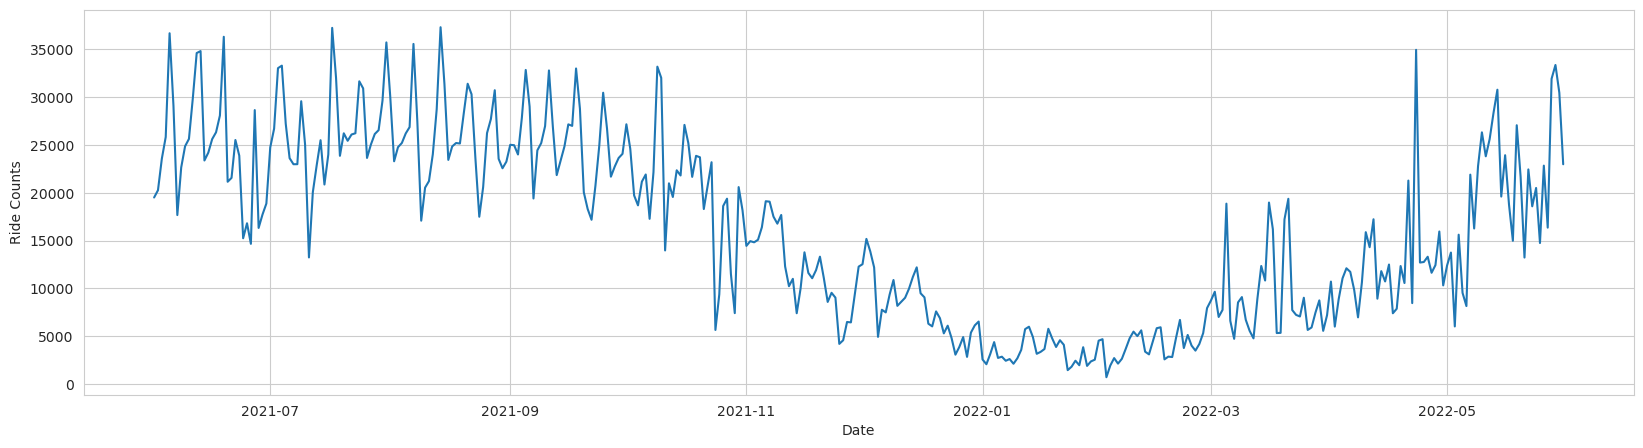

In [36]:
plt.figure(figsize=(20, 5))

sns.lineplot(x="date", y="ride_id", data=df_ride_daily);
plt.xlabel("Date")
plt.ylabel("Ride Counts")
plt.ticklabel_format(style="plain", axis="y")

As we see above, bike rental goes down in the winter.

In [37]:
df_ride_daily = df_ride_daily.reset_index()
df_ride_daily

date  ride_id
0   2021-06-01    19510
1   2021-06-02    20270
2   2021-06-03    23576
3   2021-06-04    25839
4   2021-06-05    36697
..         ...      ...
360 2022-05-27    16357
361 2022-05-28    31934
362 2022-05-29    33377
363 2022-05-30    30470
364 2022-05-31    22987

[365 rows x 2 columns]

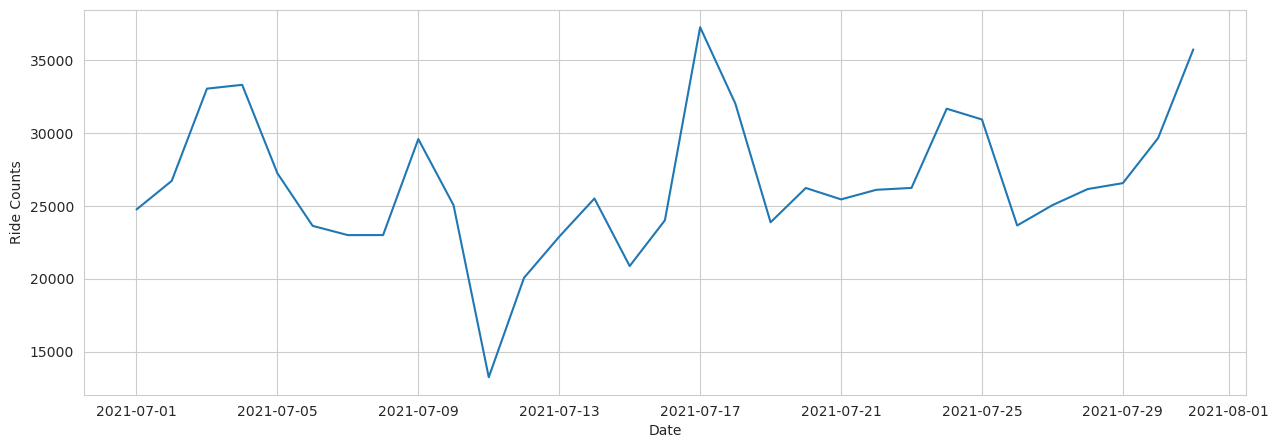

In [38]:
plt.figure(figsize=(15, 5))

data = df_ride_daily[df_ride_daily['date'].dt.month == 7]
sns.lineplot(x="date", y="ride_id", data=data);
plt.xlabel("Date")
plt.ylabel("Ride Counts")
plt.ticklabel_format(style="plain", axis="y")

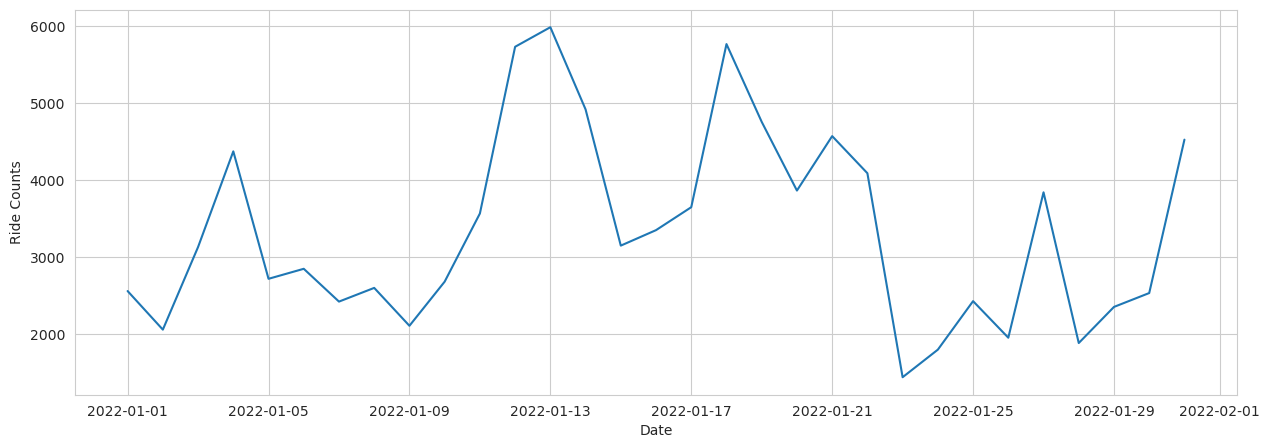

In [39]:
plt.figure(figsize=(15, 5))

data = df_ride_daily[df_ride_daily['date'].dt.month == 1]
sns.lineplot(x="date", y="ride_id", data=data);
plt.xlabel("Date")
plt.ylabel("Ride Counts")
plt.ticklabel_format(style="plain", axis="y")

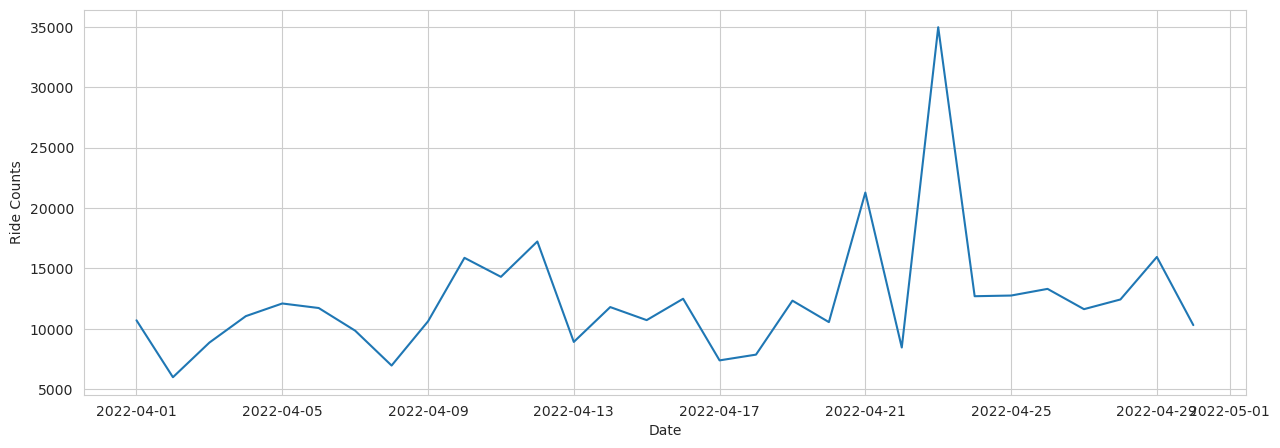

In [40]:
plt.figure(figsize=(15, 5))

data = df_ride_daily[df_ride_daily['date'].dt.month == 4]
sns.lineplot(x="date", y="ride_id", data=data);
plt.xlabel("Date")
plt.ylabel("Ride Counts")
plt.ticklabel_format(style="plain", axis="y")

### Weekday/Weekend Rides

In [41]:
df_ride_daily_weekday = pd.DataFrame(df.groupby(["date", "is_weekend"]).ride_id.count())

In [42]:
df_ride_daily_weekday = df_ride_daily_weekday.reset_index()
df_ride_daily_weekday

date is_weekend  ride_id
0   2021-06-01    Weekday    19510
1   2021-06-02    Weekday    20270
2   2021-06-03    Weekday    23576
3   2021-06-04    Weekday    25839
4   2021-06-05    Weekend    36697
..         ...        ...      ...
360 2022-05-27    Weekday    16357
361 2022-05-28    Weekend    31934
362 2022-05-29    Weekend    33377
363 2022-05-30    Weekday    30470
364 2022-05-31    Weekday    22987

[365 rows x 3 columns]

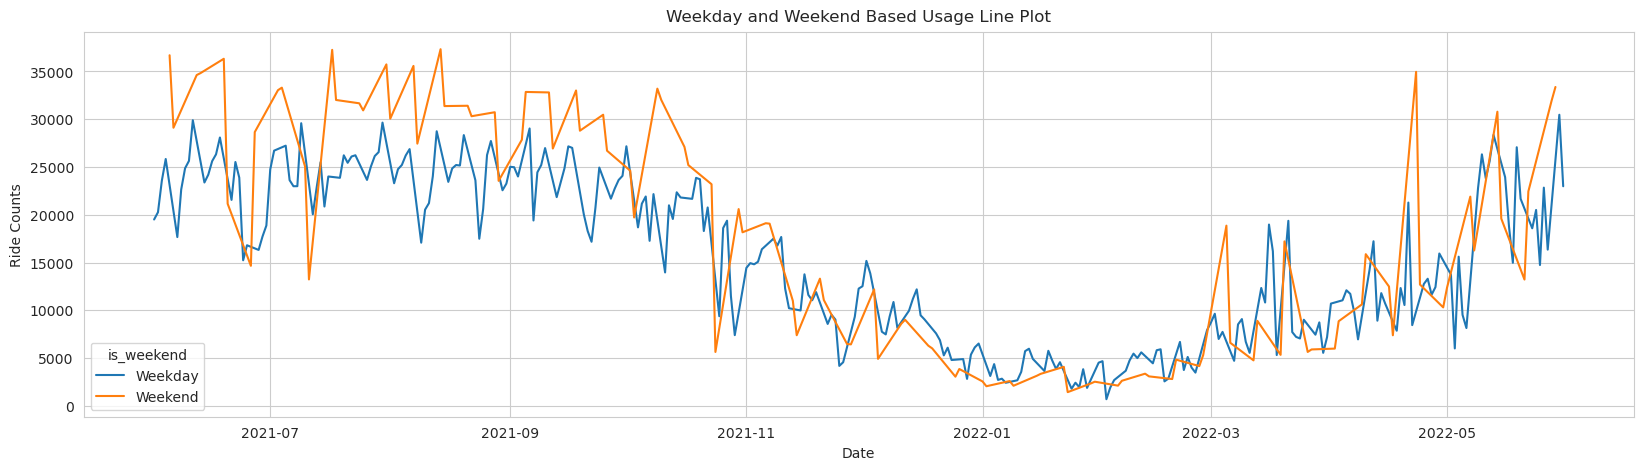

In [43]:
plt.figure(figsize=(20, 5))

sns.lineplot(x="date", y="ride_id", hue="is_weekend", data=df_ride_daily_weekday, sort=False)

plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("Date")
plt.ylabel("Ride Counts")

plt.title('Weekday and Weekend Based Usage Line Plot', y=1.005)

plt.show()

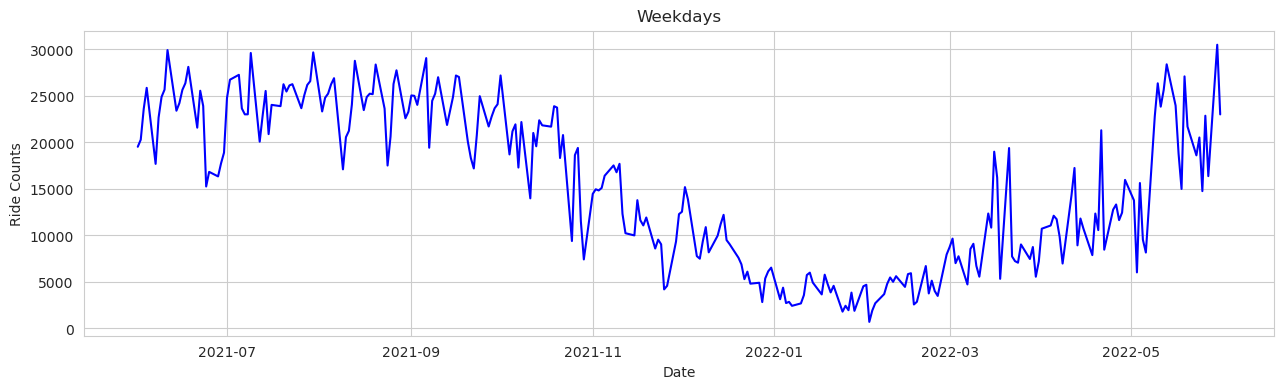

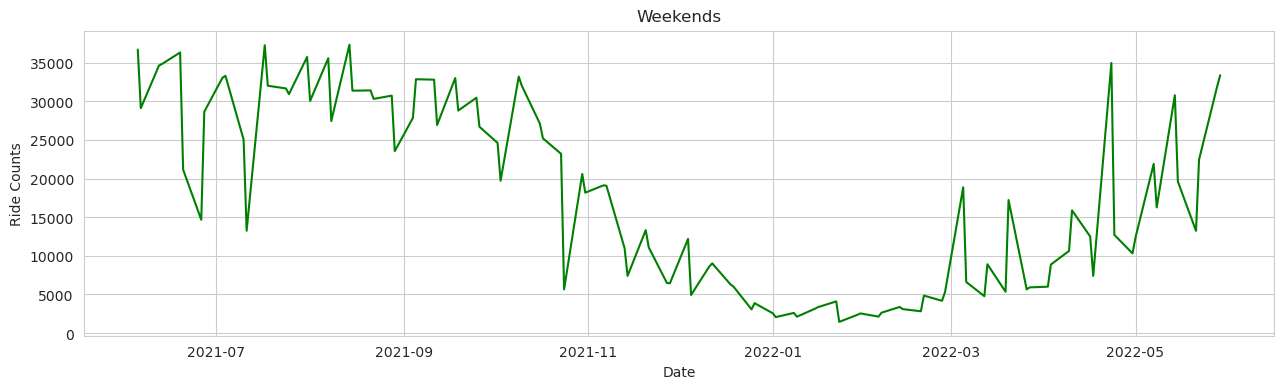

In [44]:
for i in range(1, 3):
    plt.figure(figsize=(25, 4))
    hue = df_ride_daily_weekday["is_weekend"].value_counts().index[i-1]
    data = df_ride_daily_weekday[df_ride_daily_weekday["is_weekend"] == hue]
    col = ["blue", "green"]
    
    plt.subplot(1, 2, i)
    plt.title(f"{hue}s", y=1.005)
    sns.lineplot(x="date", y="ride_id", data=data, color=col[i-1], sort=False)
    plt.ticklabel_format(style="plain", axis="y")
    plt.xlabel("Date")
    plt.ylabel("Ride Counts")
    plt.tight_layout()
    plt.show()

In particular, here is no difference between weekdays and weekends.

### Month Based  Rides

In [45]:
df_ride_monthly = pd.DataFrame(df.groupby(["year", "month"]).ride_id.count())
# Multi-indexed dataframe

In [46]:
df_ride_monthly

ride_id
year month         
2021 6       729595
     7       822410
     8       804352
     9       756147
     10      631226
     11      359978
     12      247540
2022 1       103770
     2       115609
     3       284042
     4       371249
     5       634858

In [47]:
df_ride_monthly = df_ride_monthly.reset_index()
df_ride_monthly.sort_values(by=["year", "month"], inplace=True)
df_ride_monthly

year  month  ride_id
0   2021      6   729595
1   2021      7   822410
2   2021      8   804352
3   2021      9   756147
4   2021     10   631226
5   2021     11   359978
6   2021     12   247540
7   2022      1   103770
8   2022      2   115609
9   2022      3   284042
10  2022      4   371249
11  2022      5   634858

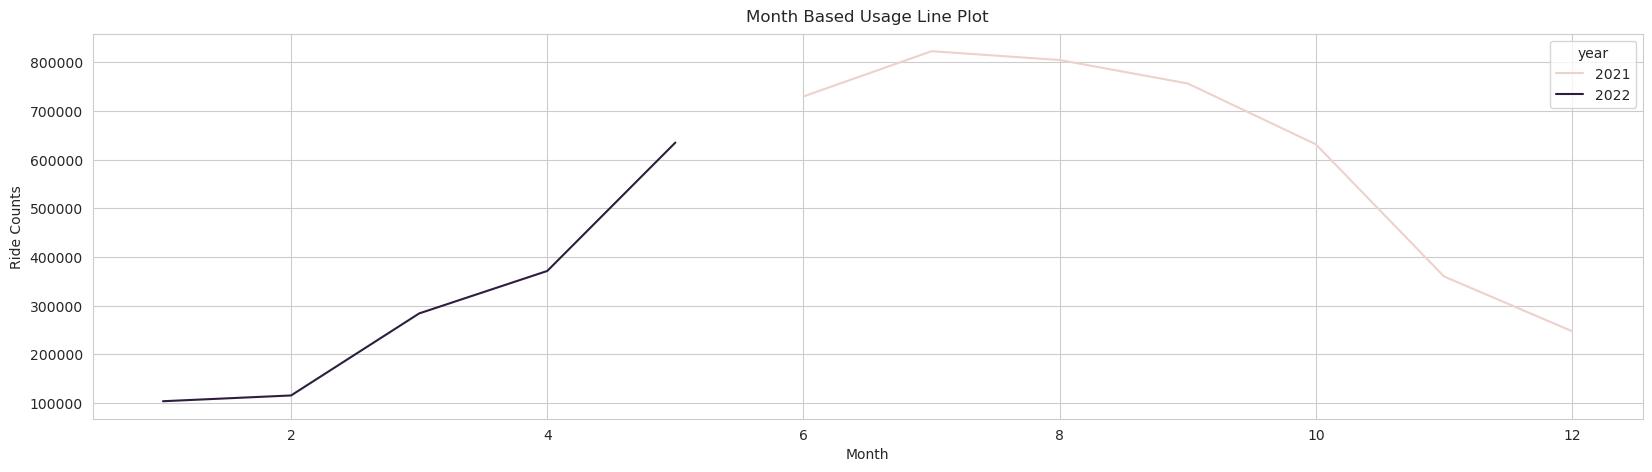

In [48]:
plt.figure(figsize=(20, 5))

sns.lineplot(x="month", y="ride_id", hue="year", data=df_ride_monthly, sort=False)

plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("Month")
plt.ylabel("Ride Counts")

plt.title('Month Based Usage Line Plot', y=1.01)

plt.show()

Bike rental is correlated with the weather. Customers do not want to ride at cold or rainy weather.

### Member/Casual User Rides

In [49]:
df_date_member_casual = pd.DataFrame(df.groupby(["date","member_casual"]).ride_id.count())

In [50]:
df_date_member_casual = df_date_member_casual.reset_index()
df_date_member_casual

date member_casual  ride_id
0   2021-06-01        casual     8482
1   2021-06-01        member    11028
2   2021-06-02        casual     8239
3   2021-06-02        member    12031
4   2021-06-03        casual    10758
..         ...           ...      ...
725 2022-05-29        member    12240
726 2022-05-30        casual    18312
727 2022-05-30        member    12158
728 2022-05-31        casual     9228
729 2022-05-31        member    13759

[730 rows x 3 columns]

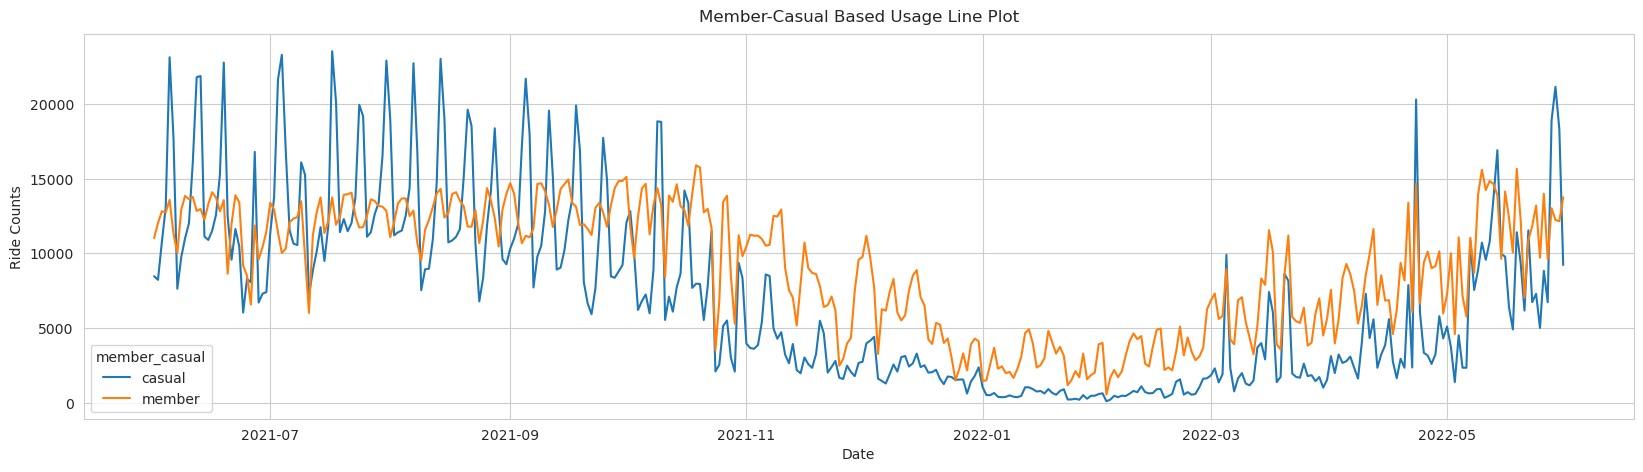

In [51]:
plt.figure(figsize=(20, 5))

sns.lineplot(x="date", y="ride_id", hue="member_casual", data=df_date_member_casual, sort=False)

plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("Date")
plt.ylabel("Ride Counts")

plt.title('Member-Casual Based Usage Line Plot', y=1.01)

plt.show()

Members rent bikes more regularly than casual customers.

### Day Based Member/Casual User Rides

In [52]:
df_day_based_member_casual = pd.DataFrame(df.groupby(["date", "day_name", "member_casual"]).ride_id.count())

In [53]:
df_day_based_member_casual = df_day_based_member_casual.reset_index()
df_day_based_member_casual

date   day_name member_casual  ride_id
0   2021-06-01    Tuesday        casual     8482
1   2021-06-01    Tuesday        member    11028
2   2021-06-02  Wednesday        casual     8239
3   2021-06-02  Wednesday        member    12031
4   2021-06-03   Thursday        casual    10758
..         ...        ...           ...      ...
725 2022-05-29     Sunday        member    12240
726 2022-05-30     Monday        casual    18312
727 2022-05-30     Monday        member    12158
728 2022-05-31    Tuesday        casual     9228
729 2022-05-31    Tuesday        member    13759

[730 rows x 4 columns]

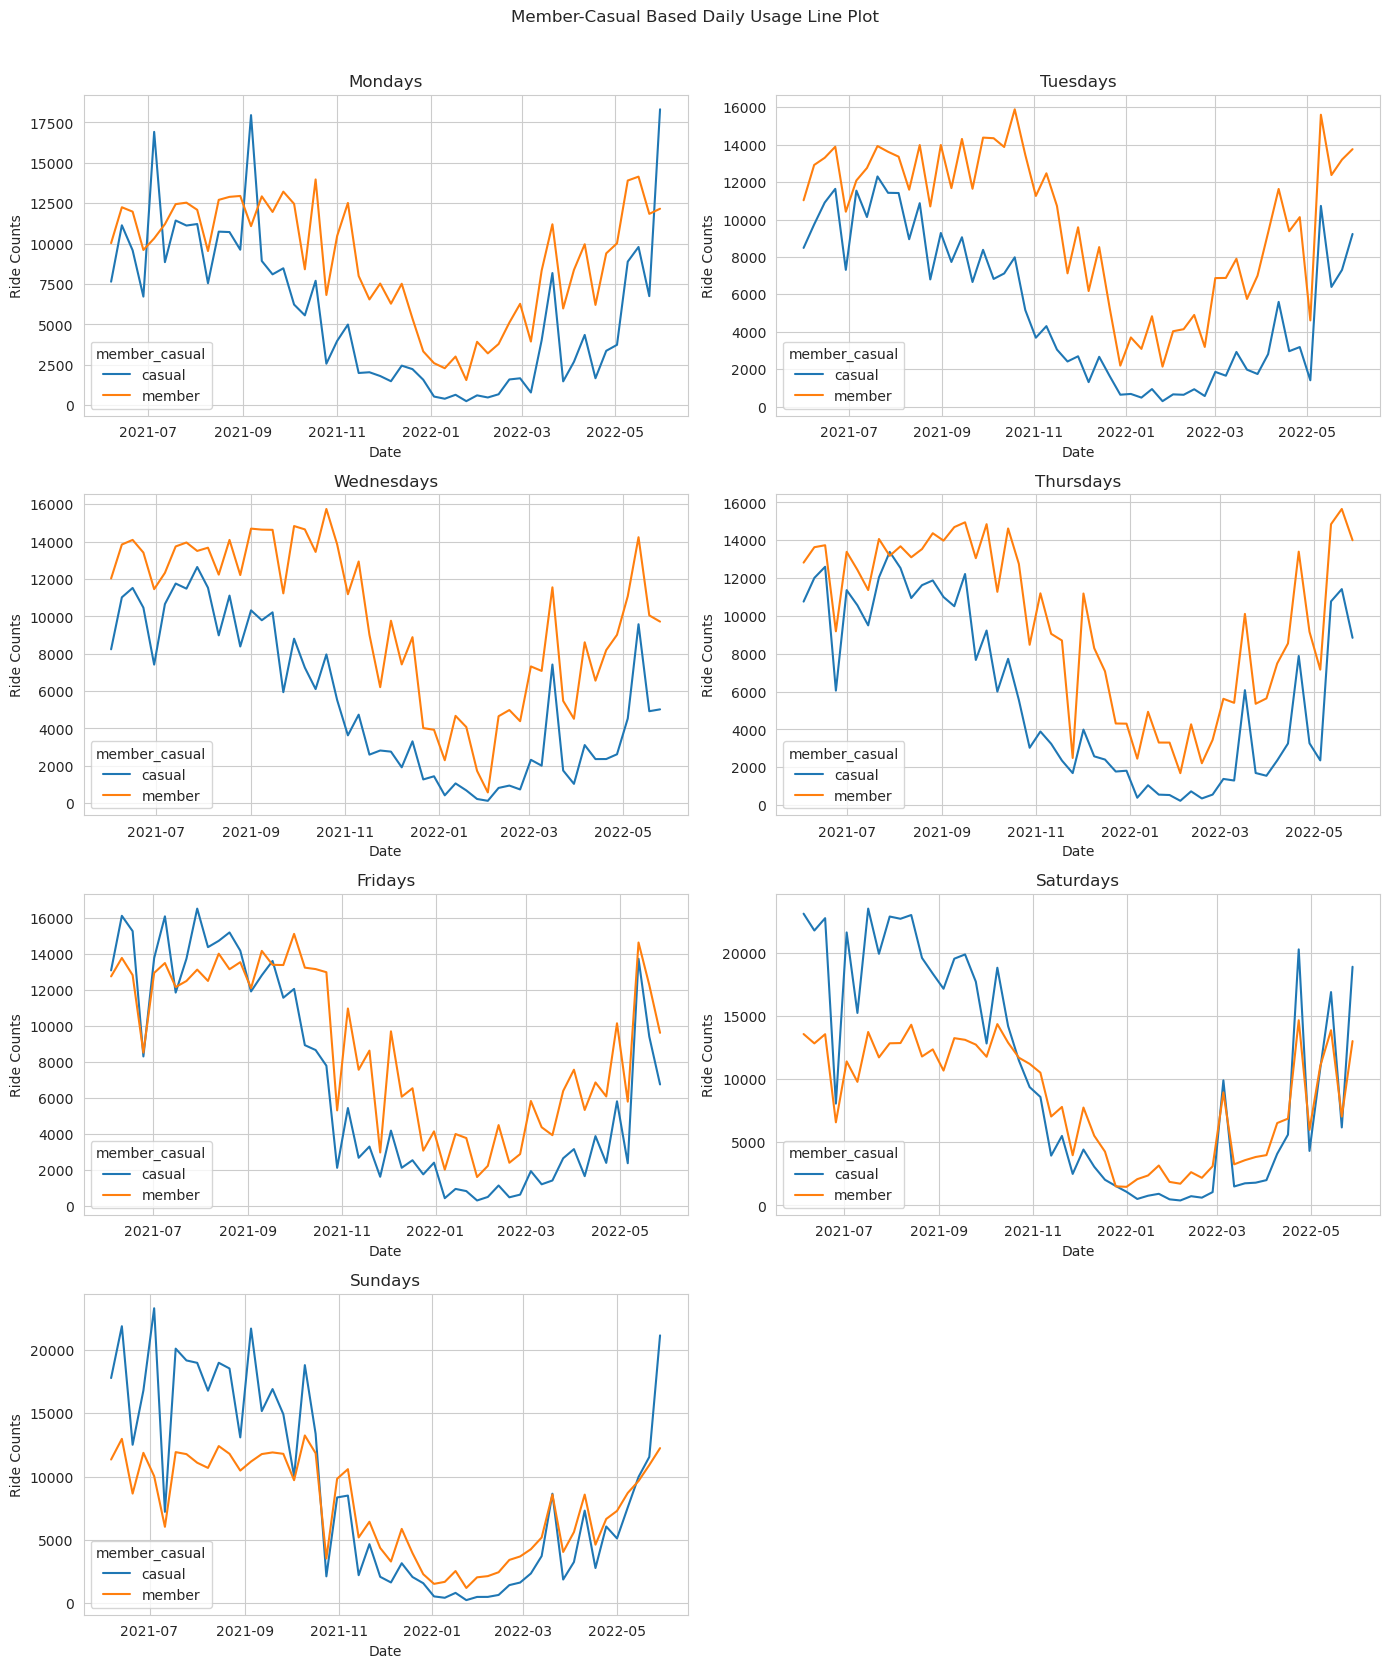

In [54]:
plt.figure(figsize=(14, 20))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i,j in enumerate(days):
    plt.subplot(5, 2, i+1)
    df_day = df_day_based_member_casual[df_day_based_member_casual["day_name"] == j]
    plt.title(f"{j}s")
    sns.lineplot(x="date", y="ride_id", hue="member_casual", data=df_day, sort=False)
    plt.ticklabel_format(style="plain", axis="y")
    plt.xlabel("Date")
    plt.ylabel("Ride Counts")        

plt.suptitle("Member-Casual Based Daily Usage Line Plot", y=1.01)
plt.tight_layout()

plt.show()

Members use bikes in weekdays, probably they take bikes for going and back to work.

### Day Based Bike Types Rides

In [55]:
df_day_based_bike_type = pd.DataFrame(df.groupby(["date", "day_name", "rideable_type"]).ride_id.count())

In [56]:
df_day_based_bike_type = df_day_based_bike_type.reset_index()
df_day_based_bike_type

date   day_name  rideable_type  ride_id
0    2021-06-01    Tuesday   classic_bike    11357
1    2021-06-01    Tuesday    docked_bike     1331
2    2021-06-01    Tuesday  electric_bike     6822
3    2021-06-02  Wednesday   classic_bike    11654
4    2021-06-02  Wednesday    docked_bike     1097
...         ...        ...            ...      ...
1090 2022-05-30     Monday    docked_bike     2053
1091 2022-05-30     Monday  electric_bike    10929
1092 2022-05-31    Tuesday   classic_bike    13009
1093 2022-05-31    Tuesday    docked_bike      812
1094 2022-05-31    Tuesday  electric_bike     9166

[1095 rows x 4 columns]

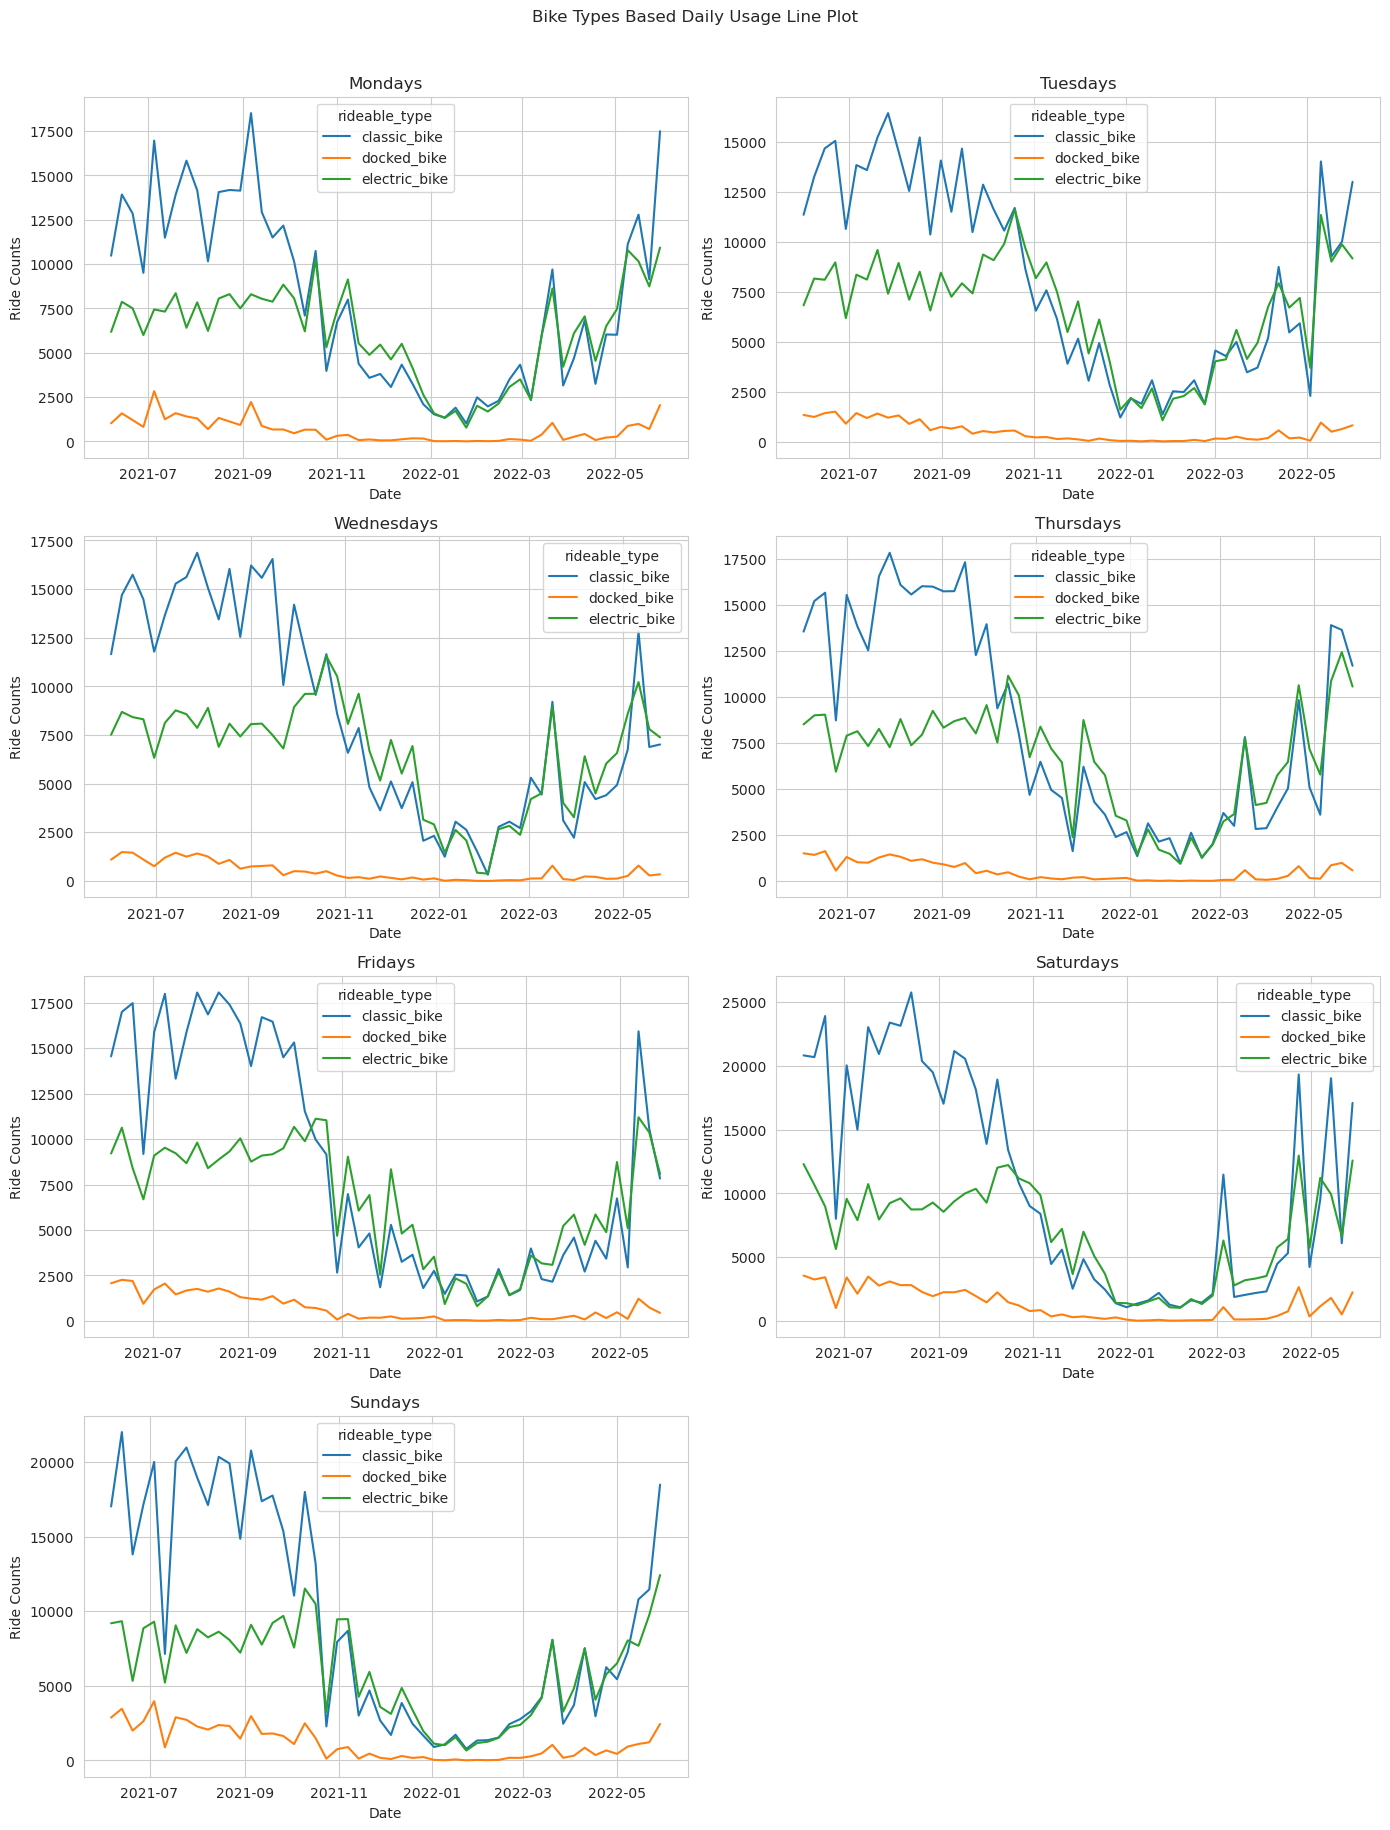

In [57]:
plt.figure(figsize=(14, 22))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i,j in enumerate(days):
    plt.subplot(5, 2, i+1)
    df_day = df_day_based_bike_type[df_day_based_bike_type["day_name"] == j]
    plt.title(f"{j}s")
    sns.lineplot(x="date", y="ride_id", hue="rideable_type", data=df_day, sort=False)
    plt.ticklabel_format(style="plain", axis="y")
    plt.xlabel("Date")
    plt.ylabel("Ride Counts")        

plt.suptitle("Bike Types Based Daily Usage Line Plot", y=1.01)
plt.tight_layout()

plt.show()

Classic bicycles are used a lot. There might be more classic bicycles than others.

### Day Based Bike Types Total Ride Hours

In [58]:
df_day_based_bike_type_rides = pd.DataFrame(df.groupby(["date", "day_name", "rideable_type"]).ride_time.sum() / 60)
# ride_time values were minute typed, now hour

In [59]:
df_day_based_bike_type_rides = df_day_based_bike_type_rides.reset_index()
df_day_based_bike_type_rides

date   day_name  rideable_type  ride_time
0    2021-06-01    Tuesday   classic_bike   3792.672
1    2021-06-01    Tuesday    docked_bike   2597.252
2    2021-06-01    Tuesday  electric_bike   2096.320
3    2021-06-02  Wednesday   classic_bike   3469.415
4    2021-06-02  Wednesday    docked_bike   2951.387
...         ...        ...            ...        ...
1090 2022-05-30     Monday    docked_bike   2647.848
1091 2022-05-30     Monday  electric_bike   3521.968
1092 2022-05-31    Tuesday   classic_bike   3915.047
1093 2022-05-31    Tuesday    docked_bike    791.678
1094 2022-05-31    Tuesday  electric_bike   2197.317

[1095 rows x 4 columns]

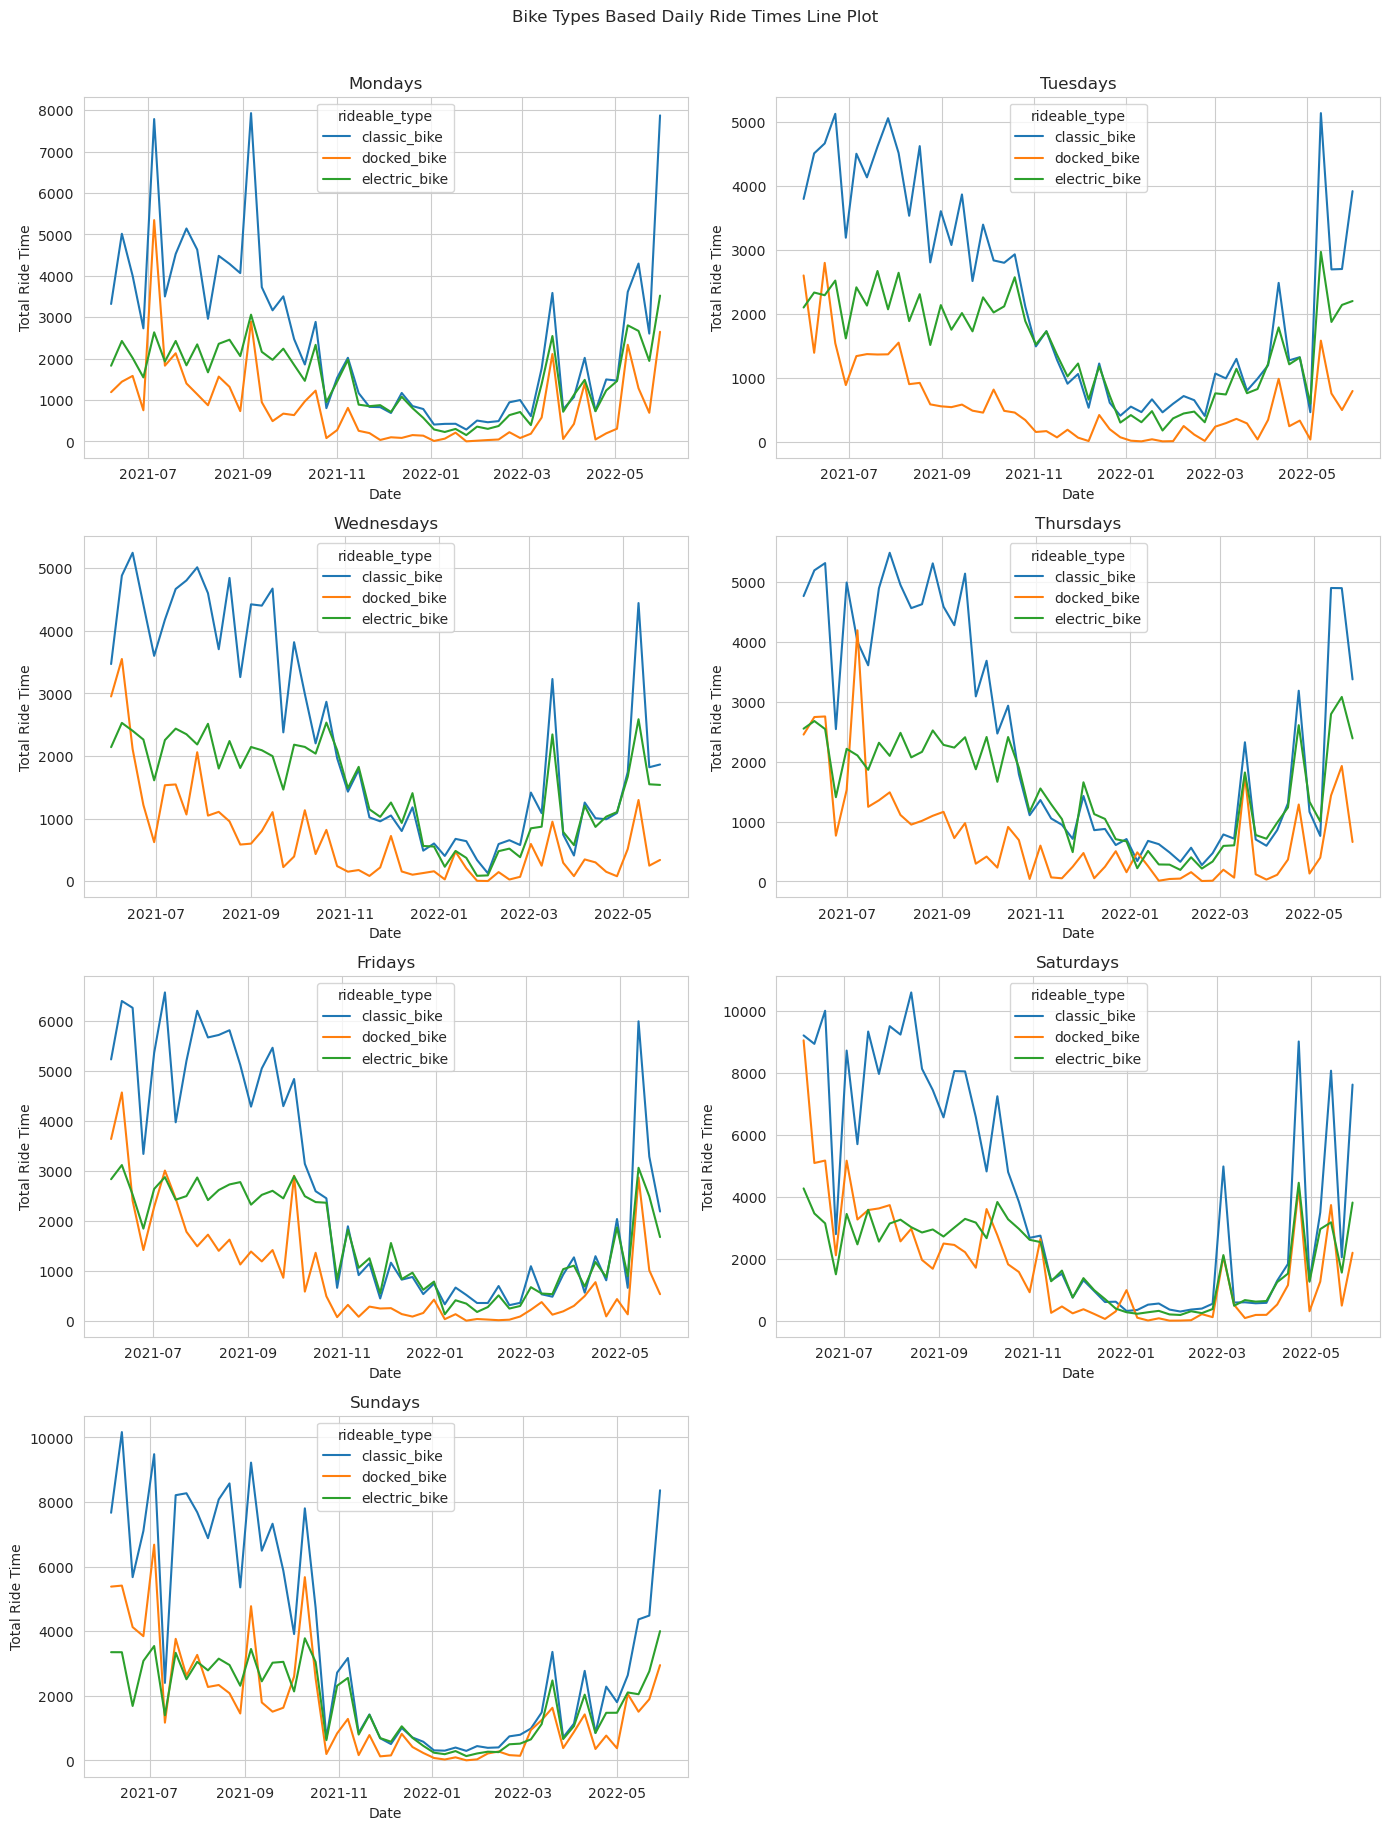

In [60]:
plt.figure(figsize=(14, 22))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i,j in enumerate(days):
    plt.subplot(5, 2, i+1)
    df_day = df_day_based_bike_type_rides[df_day_based_bike_type_rides["day_name"] == j]
    plt.title(f"{j}s")
    sns.lineplot(x="date", y="ride_time", hue="rideable_type", data=df_day, sort=False)
    plt.ticklabel_format(style="plain", axis="y")
    plt.xlabel("Date")
    plt.ylabel("Total Ride Time")
        
plt.suptitle("Bike Types Based Daily Ride Times Line Plot", y=1.01)
plt.tight_layout()

plt.show()

### Day Based Hourly Member/Casual User Rides

In [61]:
df_day_hour_based_member_casual = pd.DataFrame(df.groupby(["day_name", "member_casual", "hour"]).ride_id.count())

In [62]:
df_day_hour_based_member_casual = df_day_hour_based_member_casual.reset_index()
df_day_hour_based_member_casual

day_name member_casual  hour  ride_id
0       Friday        casual     0     6543
1       Friday        casual     1     4263
2       Friday        casual     2     2328
3       Friday        casual     3     1427
4       Friday        casual     4     1195
..         ...           ...   ...      ...
331  Wednesday        member    19    33744
332  Wednesday        member    20    23432
333  Wednesday        member    21    17509
334  Wednesday        member    22    12147
335  Wednesday        member    23     7037

[336 rows x 4 columns]

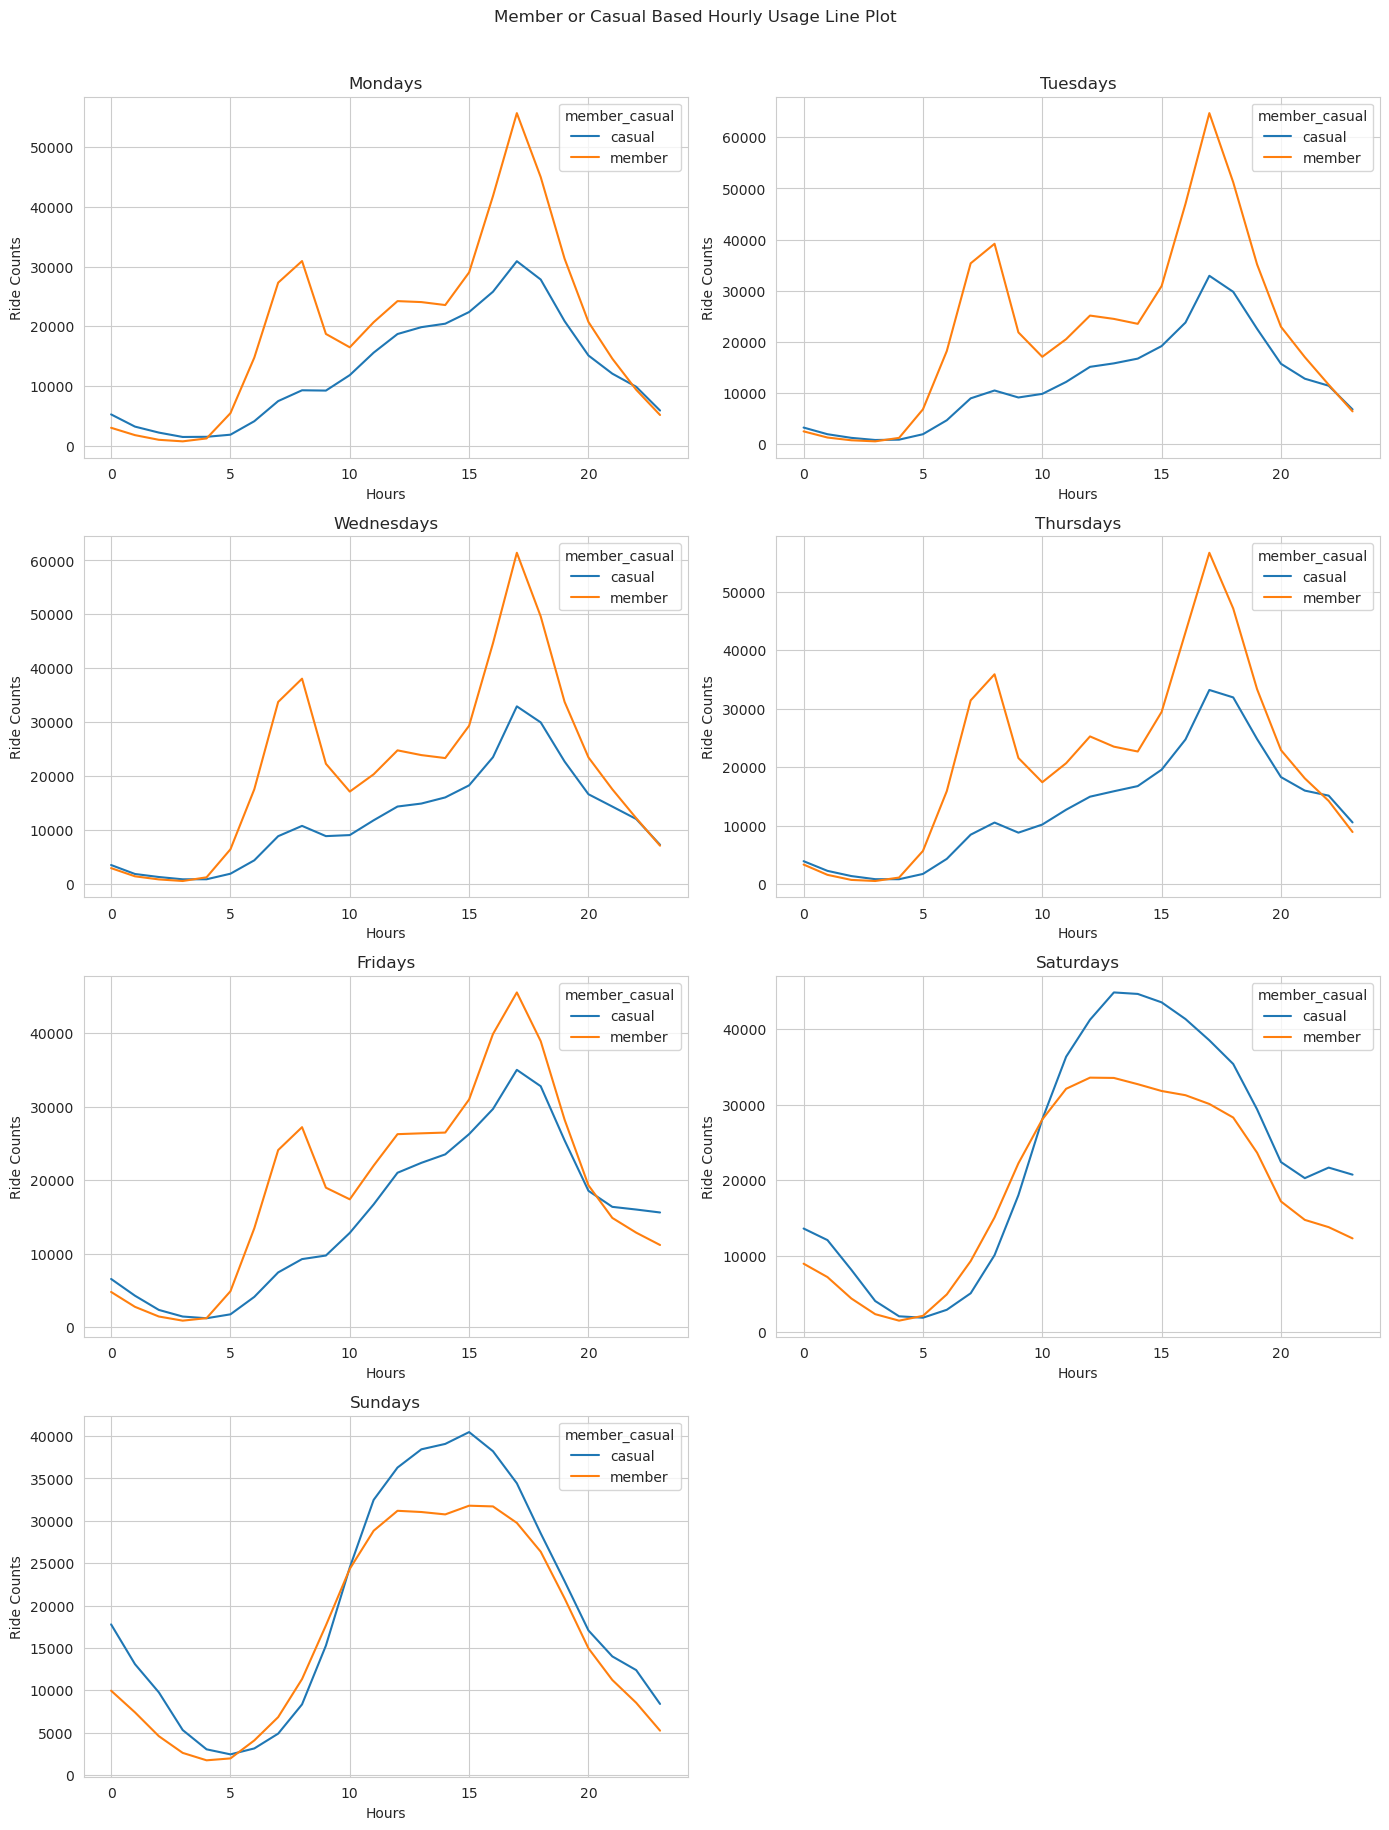

In [63]:
plt.figure(figsize=(14, 22))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i,j in enumerate(days):
    plt.subplot(5, 2, i+1)
    df_day = df_day_hour_based_member_casual[df_day_hour_based_member_casual["day_name"] == j]
    plt.title(f"{j}s")
    sns.lineplot(x="hour", y="ride_id", hue="member_casual", data=df_day, sort=False)
    plt.ticklabel_format(style="plain", axis="y")
    plt.xlabel("Hours")
    plt.ylabel("Ride Counts")
    
plt.suptitle("Member or Casual Based Hourly Usage Line Plot", y=1.01)
plt.tight_layout()

plt.show()

- Most bike rental hours are around 7 am and 5 pm in **weekdays**. It seems, the members use bikes to commute to work.
- At the **weekend** the casual customers use bikes more than members. 

### Plotting Categorical Columns

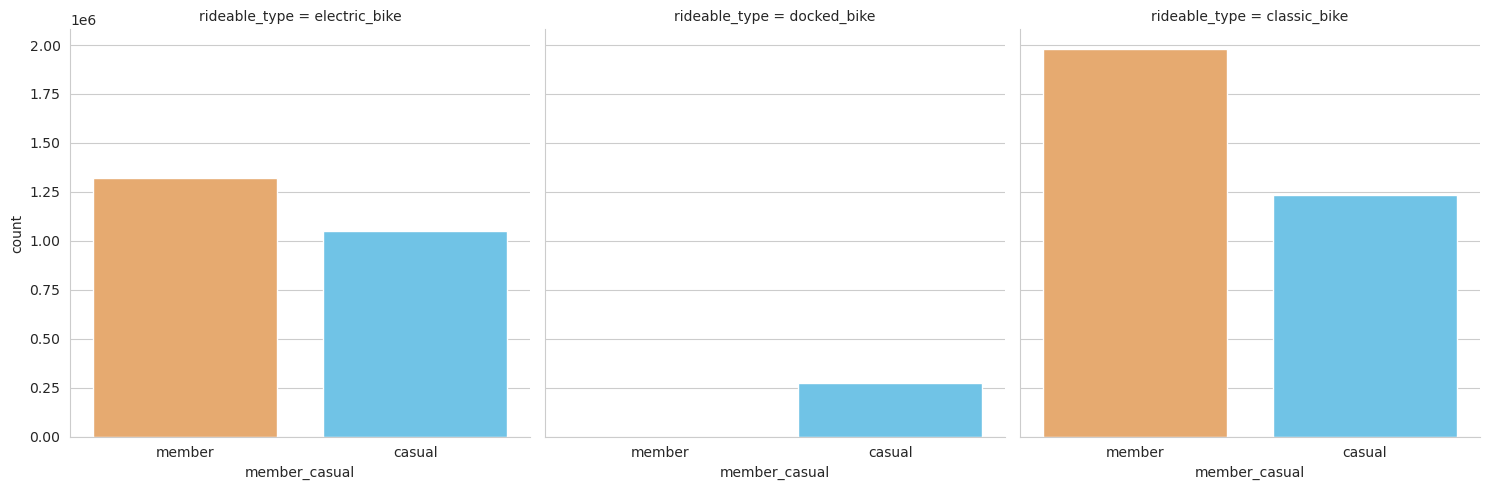

In [64]:
# Set a custom color palette
sns.set_palette(['#FAA95C', '#5CCBFA'])

chart = sns.catplot(x="member_casual", data=df, kind="count", col="rideable_type");
plt.tight_layout()

Members rent mostly classic bikes and they never use docked bikes.

# <p style="background-color:#00CC99; font-family:newtimeroman; color:#FFF9ED; font-size:125%; text-align:center; border-radius:10px 10px; padding:10px;">Location Based Inspection</p>

In [65]:
df = df[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng', 
         'end_lat', 'end_lng', 'member_casual', 'is_weekend', 
         'day_name', 'date', 'year', 'month', 'day_of_month', 'hour', 'ride_time']]

In [66]:
df.sample(5)

ride_id  rideable_type          started_at  \
198693  E090041979306E85   classic_bike 2021-08-11 15:32:38   
166304  DD12626F889BFA68  electric_bike 2021-10-30 17:40:46   
10194   F6ACF0E3B730DD57  electric_bike 2021-09-30 16:44:54   
678248  DF7C22507C6B4018   classic_bike 2021-06-09 13:11:15   
310134  9EAE5C73DA5B3454   classic_bike 2021-06-23 16:21:09   

                  ended_at           start_station_name  \
198693 2021-08-11 15:37:50         New St & Illinois St   
166304 2021-10-30 17:50:27      State St & Van Buren St   
10194  2021-09-30 16:51:58     University Ave & 57th St   
678248 2021-06-09 14:44:35  Western Ave & Congress Pkwy   
310134 2021-06-23 16:26:02     Paulina St & Flournoy St   

                   end_station_name  start_lat  start_lng  end_lat  end_lng  \
198693  Field Blvd & South Water St     41.891    -87.619   41.886  -87.618   
166304         Canal St & Taylor St     41.877    -87.628   41.870  -87.639   
10194           Orleans St & Elm St     41.791    -87.600   41.800  -87.580   
678248  Western Ave & Congress Pkwy     41.875    -87.686   41.875  -87.686   
310134     Loomis St & Jackson Blvd     41.873    -87.669   41.878  -87.662   

       member_casual is_weekend   day_name       date  year  month  \
198693        member    Weekday  Wednesday 2021-08-11  2021      8   
166304        member    Weekend   Saturday 2021-10-30  2021     10   
10194         member    Weekday   Thursday 2021-09-30  2021      9   
678248        casual    Weekday  Wednesday 2021-06-09  2021      6   
310134        member    Weekday  Wednesday 2021-06-23  2021      6   

        day_of_month  hour  ride_time  
198693            11    15      5.200  
166304            30    17      9.700  
10194             30    16      7.100  
678248             9    13     93.300  
310134            23    16      4.900

In [67]:
df_start_loc = pd.DataFrame(df.groupby(["start_station_name", "start_lat", "start_lng", "month"]).ride_id.count())

In [68]:
df_start_loc = df_start_loc.reset_index()
df_start_loc

start_station_name  start_lat  start_lng  month  ride_id
0        111th St - Morgan Park Metra     41.690    -87.670      5        4
1                 2112 W Peterson Ave     41.780    -87.720      5        1
2                 2112 W Peterson Ave     41.800    -87.710      5        1
3                 2112 W Peterson Ave     41.810    -87.730      5        1
4                 2112 W Peterson Ave     41.880    -87.650      3        1
...                               ...        ...        ...    ...      ...
1651603          Yates Blvd & 93rd St     41.726    -87.566      9        1
1651604          Yates Blvd & 93rd St     41.726    -87.566      9        1
1651605     Yates Blvd & Exchange Ave     41.760    -87.570      5        1
1651606     Yates Blvd & Exchange Ave     41.770    -87.570      5        3
1651607                Zapata Academy     41.840    -87.740      5        1

[1651608 rows x 5 columns]

In [69]:
data = df_start_loc.sort_values(by="ride_id", ascending=False).head(20000)
data

start_station_name  start_lat  start_lng  month  \
1438737             Streeter Dr & Grand Ave     41.892    -87.612      7   
1438738             Streeter Dr & Grand Ave     41.892    -87.612      8   
1438736             Streeter Dr & Grand Ave     41.892    -87.612      6   
1438739             Streeter Dr & Grand Ave     41.892    -87.612      9   
565381   DuSable Lake Shore Dr & North Blvd     41.912    -87.627      8   
...                                     ...        ...        ...    ...   
310174                Clark St & Leland Ave     41.950    -87.670     11   
1383609                  State St & 19th St     41.910    -87.620      7   
905529              Lawndale Ave & 111th St     41.691    -87.713      5   
309426                Clark St & Leland Ave     41.900    -87.710     10   
1321767         Sheridan Rd & Noyes St (NU)     41.750    -87.600      7   

         ride_id  
1438737    14619  
1438738    12299  
1438736    11683  
1438739     9664  
565381      7844  
...          ...  
310174        13  
1383609       13  
905529        13  
309426        13  
1321767       13  

[20000 rows x 5 columns]

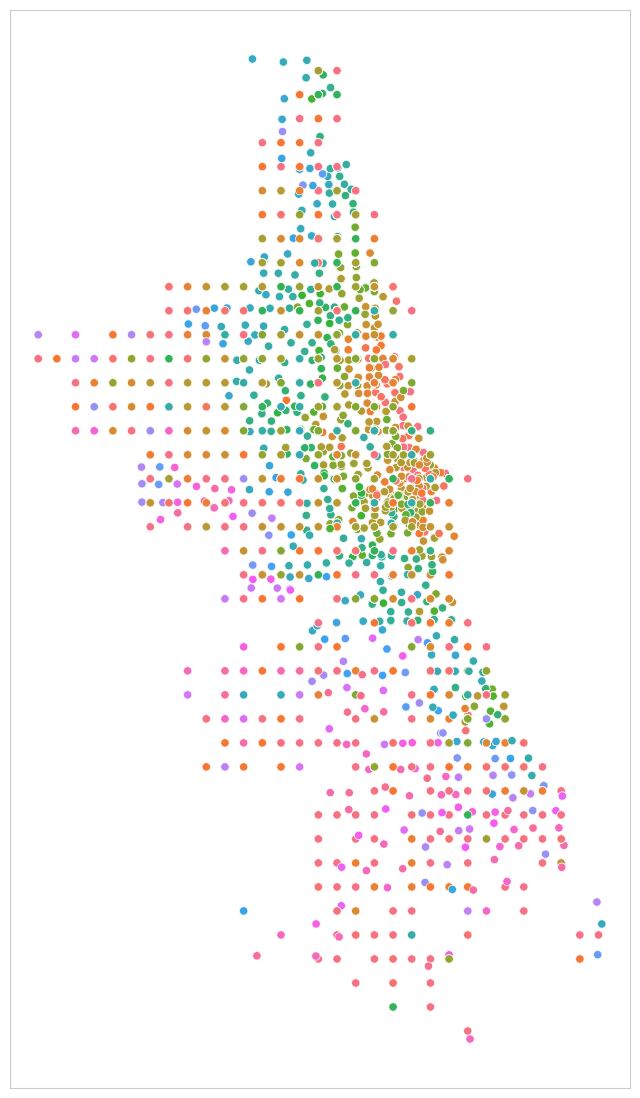

In [70]:
plt.figure(figsize=(8, 14))
sns.scatterplot(x='start_lng', y='start_lat', data=data, hue="start_station_name", legend=False);
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.show()

In [71]:
# !pip install folium

In [72]:
import folium
import branca.colormap as cm

In [73]:
lat = df["start_lat"].mean()
long = df["start_lng"].mean()
round(lat, 2), round(long, 2)

(41.9, -87.65)

In [74]:
folium.Map(location=[lat, long], zoom_start=10)

**Station Based Total Rides**

In [75]:
data2 = pd.DataFrame(data.groupby(["start_station_name", "start_lat", "start_lng"]).ride_id.sum())
data2 = data2.reset_index()

In [76]:
data2.sort_values(by="ride_id", ascending=False)
data2

start_station_name  start_lat  start_lng  ride_id
0              2112 W Peterson Ave     41.991    -87.684      526
1                    63rd St Beach     41.781    -87.576      929
2                    63rd St Beach     41.781    -87.576      366
3                    63rd St Beach     41.781    -87.576      105
4                900 W Harrison St     41.875    -87.650     7193
...                            ...        ...        ...      ...
4536        Woodlawn Ave & 55th St     41.800    -87.600       18
4537        Woodlawn Ave & 55th St     41.800    -87.590       20
4538  Woodlawn Ave & Lake Park Ave     41.814    -87.597     1017
4539  Woodlawn Ave & Lake Park Ave     41.814    -87.597      145
4540          Yates Blvd & 75th St     41.759    -87.566      155

[4541 rows x 4 columns]

In [77]:
m = folium.Map(location=[lat, long], zoom_start=11)

colormap = cm.StepColormap(colors=["red", "orange", "yellow", "green"])

for loc, p in zip(zip(data2['start_lat'], data2['start_lng']), data2["ride_id"]):
    folium.Circle(location=loc, radius=1.5, fill=True,
                  color=colormap(p)).add_to(m)
    
# Top 100 location in the DataFrame is added as a marker to the map
for i in range(0,len(data2) // 200):
    folium.Marker([data2['start_lat'].iloc[i], data2['start_lng'].iloc[i]], 
                  tooltip=folium.Tooltip(f"Most Used:\n{data2.start_station_name[i]} // Total Rides: {data2.ride_id[i]}")).add_to(m)

m

### Total Rides Intensity Map

In [78]:
import branca

from folium import plugins
from folium.plugins import HeatMap

In [79]:
data3 = data2.iloc[:,1:]

m = folium.Map(location=[lat, long], zoom_start=11)
plugins.HeatMap(data3,radius=16).add_to(m)
m

### Total Rides Intensity Map by Monthly

In [80]:
data5 = [data[data['month'] == data['month'].unique()[i]][['start_lat','start_lng']].values.tolist() 
        for i in range(len(data['month'].unique()))]

In [81]:
monthDict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

index = [monthDict[i] for i in sorted(data['month'].unique())]

In [82]:
m = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Watercolor')
hm = plugins.HeatMapWithTime(data=data5, index=index, radius=16)

hm.add_to(m)

m

# **END**